# 数据前处理和可视化
## 1. 数据集下载并解压  
在当前目录下, 建立./Dataset目录, 将从Kaggle上下载的训练数据集train.zip和测试数据集test.zip放到./Dataset目录下, 并解压到./Dataset目录

数据集下载：https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data

## 2. 数据探索
读取训练数据集和测试数据集列表并随机选一些图像进行显示
可以看到训练数据一共25000个, dog和cat图片放在一个文件夹中, 标签用图片名表示
测试数据一共12500个, 名称中没有包含标签

### 载入必要的库

In [9]:
from matplotlib import pyplot as plt
import cv2
import os
import random 
import shutil

### 数据可视化

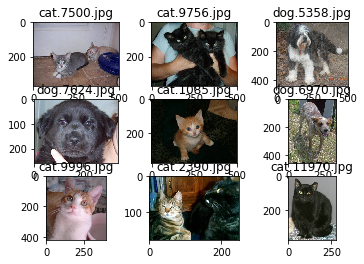

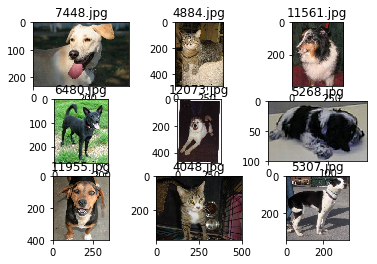

train data samples:25000
test data samples:12500


In [7]:
%matplotlib inline

train_path = './Dataset/train'
test_path = './Dataset/test'

train_list = os.listdir(train_path)
test_list = os.listdir(test_path)

random.shuffle(train_list)
random.shuffle(test_list)

plotloc = [331, 332, 333, 334, 335, 336, 337, 338, 339]

for idx, fname in enumerate(train_list):
    if idx >= 9:
        break
    img_name = os.path.join(train_path, fname)
    img = cv2.imread(img_name)
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    plt.subplot(plotloc[idx])
    plt.imshow(img)
    plt.title(fname)
plt.show()

for idx, fname in enumerate(test_list):
    if idx >= 9:
        break
    img_name = os.path.join(test_path, fname)
    img = cv2.imread(img_name)
    b, g, r = cv2.split(img)
    img = cv2.merge([r, g, b])
    plt.subplot(plotloc[idx])
    plt.imshow(img)
    plt.title(fname)
plt.show()

print("train data samples:%d" % (train_list.__len__()))
print("test data samples:%d" % (test_list.__len__()))

## 3. 数据库整理
将训练数据集的dog和cat图片放到不同的文件夹中
将测试数据集的所有图片放在同一个文件夹中, 目录深度和训练数据集保持一致

In [ ]:
train_path = './Dataset/train'
train_list = os.listdir(train_path)

os.mkdir('./Dataset/train/dog')
os.mkdir('./Dataset/train/cat')

for f in train_list:
    old_filepath = os.path.join(train_path, f)
    if 'dog' in f:
        new_filepath = os.path.join('./Dataset/train/dog', f)
    else:
        new_filepath = os.path.join('./Dataset/train/cat', f)
    shutil.move(old_filepath, new_filepath)

os.mkdir('./Dataset/test2')
shutil.move('./Dataset/test', './Dataset/test2')